In [1]:
import warnings
warnings.filterwarnings('ignore')

import argparse
import os, sys, importlib
from glob import glob
import pickle

import numpy as np
import matplotlib.pyplot as plt

from utilities import reduced_parameter as red
from field.utils import profiling_rad

import utilities.reduced_parameter as red

from utilities.etc import categorizing_result
from analyze_tools import plot_tools as pt

In [2]:
pt = importlib.reload(pt)

In [3]:
ROOT2 = "pickle_jar/"
ROOT = "/Users/macbook/OneDrive - Emory/Research data/mm_polariton/pickle_jar/"

temperature_list = []

temperature = 292 ; seed = 157 ; N_atoms = 512
temperature_list.append(temperature)

free292 = "{}_{}_25_40_{}".format(temperature, N_atoms, seed)
cav_result_folders_list292 = [
    "{}_{}_25_40_{}".format(temperature, N_atoms, seed),
    #"{}_{}_40_60_{}".format(temperature, N_atoms, seed),
    #"{}_{}_60_80_{}".format(temperature, N_atoms, seed),
]

temperature = 200 ; seed = 715 ; N_atoms = 512
temperature_list.append(temperature)

free200 = "{}_{}_25_40_{}".format(temperature, N_atoms, seed)
nofield200 = "{}_{}_None_None_{}".format(temperature, N_atoms, seed)
cav_result_folders_list200 = [
    "{}_{}_25_40_{}".format(temperature, N_atoms, seed),
    "{}_{}_40_60_{}".format(temperature, N_atoms, seed),
    "{}_{}_60_80_{}".format(temperature, N_atoms, seed),
]


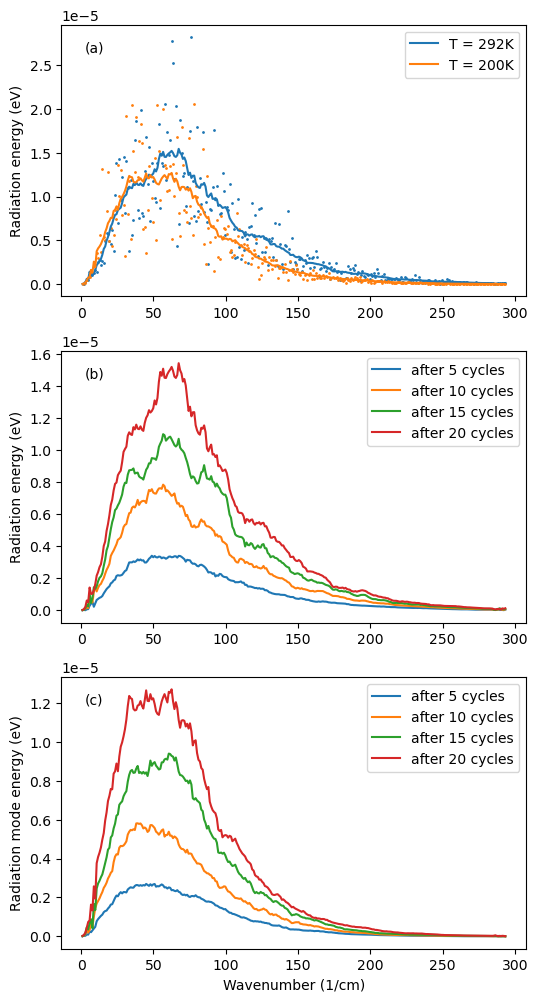

In [4]:
free_plot = pt.Plot(n_spec_plots = 3)

for i , free_result_folders in enumerate([free292, free200]):
    result_dict = categorizing_result(ROOT + free_result_folders, KEYWORDS="free")

    cycle = 19
    Afield = result_dict[cycle]["probe_field"]

    rad_energy = red.convert_energy(np.array(Afield.history["energy"][-1]), "ev")
    omega = red.convert_wavenumber(Afield.k_val)
    omega_profile, final_rad_profile = profiling_rad(omega, rad_energy)

    free_plot.add_spec_plot(
        0, omega_profile, final_rad_profile, ma_w = 20, 
        line_label = "T = {}K".format(temperature_list[i])
        )

    for cycle in range(4,20,5):
        Afield = result_dict[cycle]["probe_field"]

        rad_energy = red.convert_energy(np.array(Afield.history["energy"][-1]), "ev")
        omega = red.convert_wavenumber(Afield.k_val)
        omega_profile, final_rad_profile = profiling_rad(omega, rad_energy)

        free_plot.add_spec_plot(
            i + 1, omega_profile, final_rad_profile, ma_w = 20, scatter = False,
            line_label = "after {} cycles".format(cycle + 1))

free_plot.add_label(0, (None, "Radiation energy (eV)"))
free_plot.add_legend(0)
free_plot.add_label(1, (None, "Radiation energy (eV)"))
free_plot.add_legend(1)
free_plot.add_label(2)

free_plot.annotate()
free_plot.add_legend(2)

#free_plot.savefig("figure/test/free2_field_")


In [5]:
free_result_dict = categorizing_result(ROOT + free200, KEYWORDS="free")
nofield_result_dict = categorizing_result(ROOT2 + nofield200, KEYWORDS="nofield")

cavity_result_dict_list = []
for folder in cav_result_folders_list200:
    cavity_result_dict_list.append(
        categorizing_result(ROOT + folder, KEYWORDS = "cavity"))

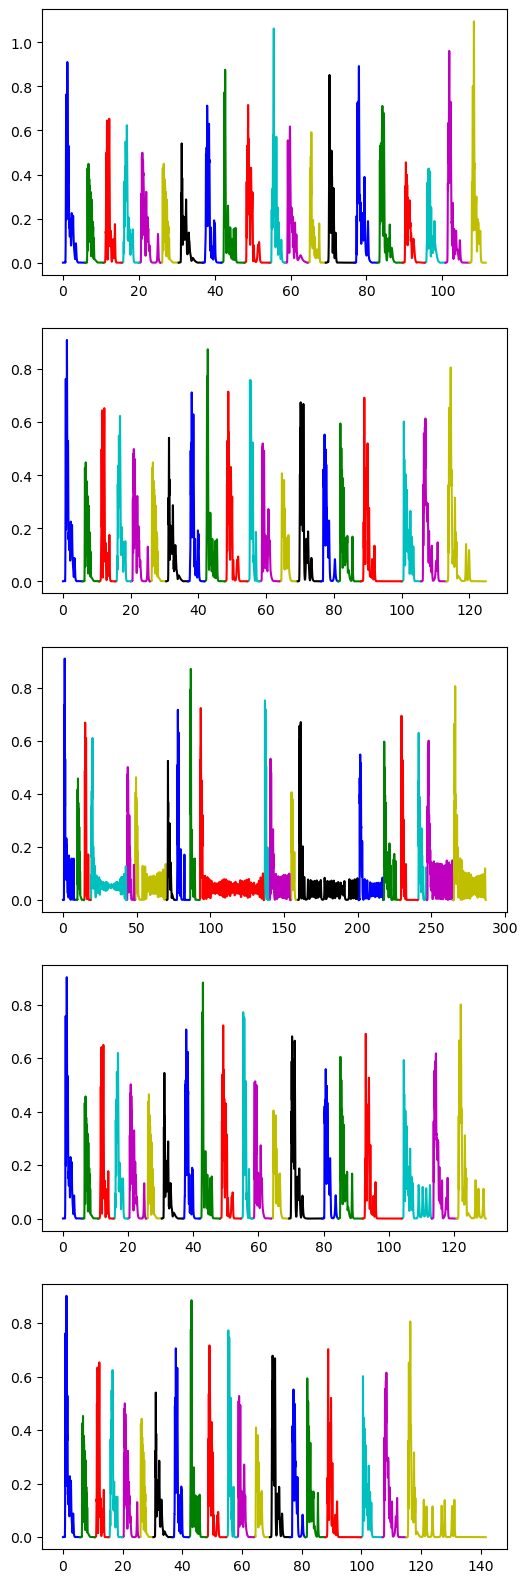

In [7]:
dipole_plot = pt.Plot(n_spec_plots = 0, n_dipole_plots = 5)
for i, result in free_result_dict.items():
    #if i >= 10 : continue
    free_obs = result["atoms"].observable
    nofield_obs = nofield_result_dict[i]["atoms"].observable
    dipole_plot.add_dipole_plot(0, nofield_obs['t'], nofield_obs['total_dipole'], index = i)
    dipole_plot.add_dipole_plot(1, free_obs['t'], free_obs['total_dipole'], index = i)

    for j, result_dict in enumerate(cavity_result_dict_list):
        cav_obs = result_dict[i]["atoms"].observable
        dipole_plot.add_dipole_plot(2 + j, cav_obs['t'], cav_obs['total_dipole'], index = i)

    #print(i)
    #print(nofield_obs['kinetic'][0])
    #print(free_obs['kinetic'][0])

In [ ]:
cavity_result_dict_list

In [ ]:
with open(ROOT2 + nofield200 + "/metadata_nofield.pkl","rb") as handle:
    info1 = pickle.load(handle)

with open(ROOT + free200 + "/metadata_free.pkl","rb") as handle:
    info2 = pickle.load(handle)

In [ ]:
info1['seed_list'] - info2['seed_list']

In [11]:
print(red.convert_wavenumber(25 * 2 * np.pi / result['atoms'].L))
print(red.convert_wavenumber(40 * 2 * np.pi / result['atoms'].L))
print(red.convert_wavenumber(60 * 2 * np.pi / result['atoms'].L))
print(red.convert_wavenumber(80 * 2 * np.pi / result['atoms'].L))

24.437927663734115
39.10068426197458
58.65102639296187
78.20136852394916
